<a href="https://colab.research.google.com/github/mrlab-tsukuba/JSMRM2022tutorial/blob/main/JSMRM_%E8%B6%85AI%E5%85%A5%E9%96%80_%E3%83%8F%E3%83%B3%E3%82%B9%E3%82%99%E3%82%AA%E3%83%B3_English.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 超AI入門 ハンズオン JSMRM2022

Meet the teacher13 超AI入門講座

2022/09/10 Sat. at Nagoya Congress Center, Nagoya, Japan

- Satoshi Funayama, MD, PhD
- Department of Radiology, Hamamatsu University School of Medicine
- funayama@hama-med.ac.jp

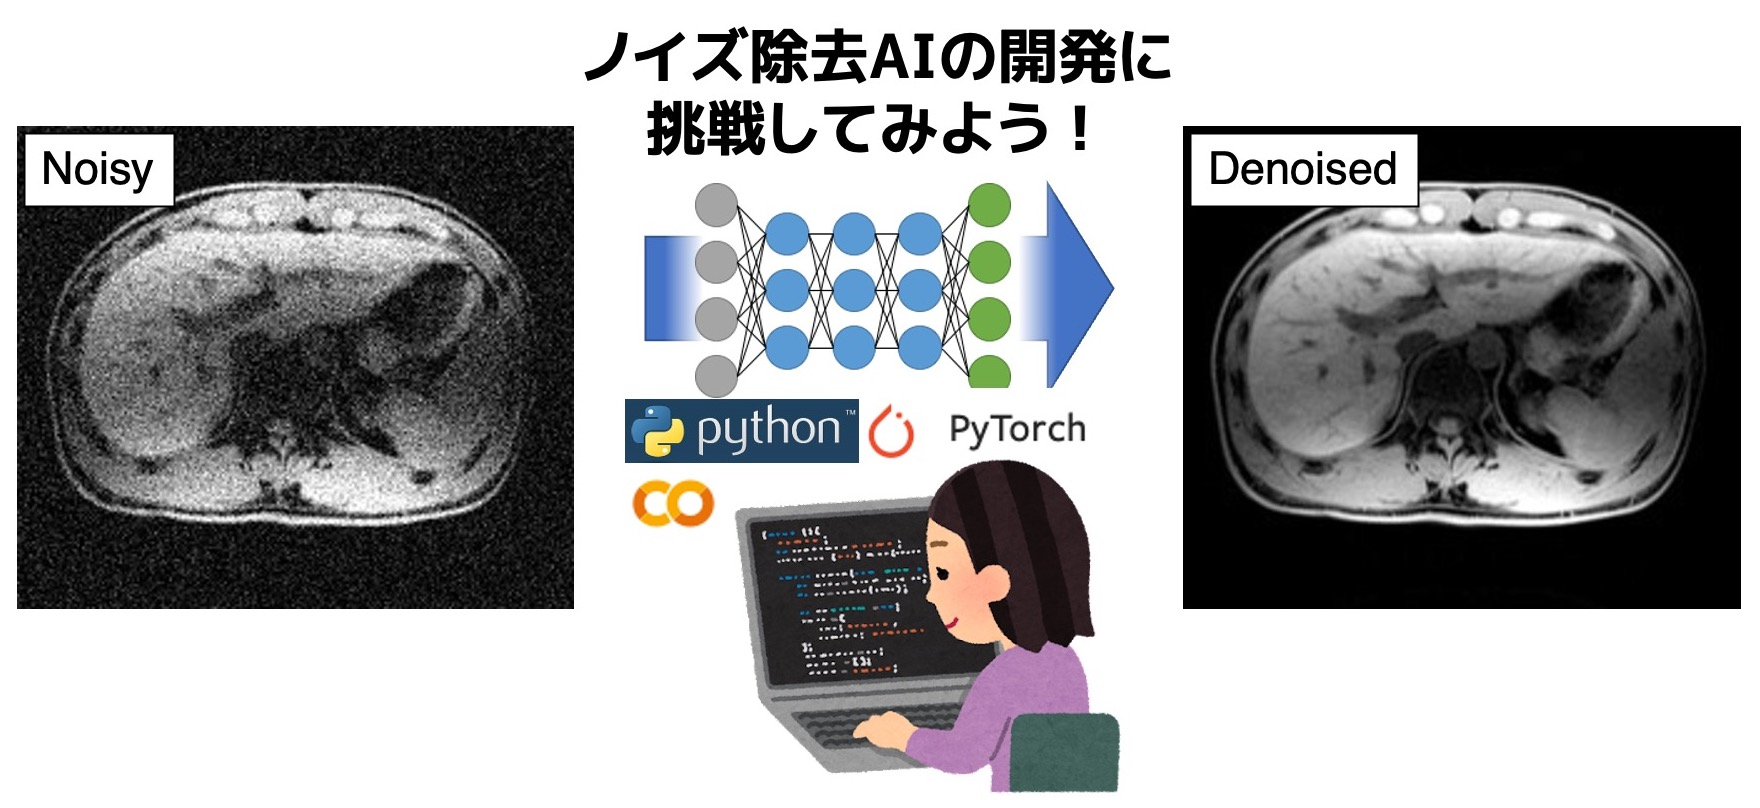

# Abstract

In this hands-on session, we will try to develop an AI to remove noise from MR images using the programming language python.

Table of Contents
1. Preparation
2. Exercise 1 - Introduction to Python
3. Exercise 2 - Introduction to PyTorch
4. Exercise 3 - Let's Do XOR Calculations with Neural Networks
5. Exercise 4 - Let's Create an AI to Remove Noise from MR Images
6. Exercise 5 - Improving Performance (Advanced)






# Prepartion

## Preparation 1 - Running Cell

In COLAB, the program is executed in units of "cells".

At the bottom of the cell is the output of the last line of execution of the cell.

Let's check the output by executing the cell below.

- ctrl/cmd & Enter: Run cell
- Shift + Enter: Run cell + select next cell

In [ ]:
print("Hello, world!")

Hello, world!


In [ ]:
# Anything to the right of "#" is interpreted as a comment and has no effect on the program.

1.0 + 1.0   # -> 2

## Preparation 2 - GPUを有効化

GPUs (graphics processing units) can be used to accelerate deep learning calculations.

### How to enable GPU

1. Select colab top menu > Runtime > Change Runtime Type.
1. Set "Hardware Accelerator" to "GPU".

Run the following cells to verify that the GPU is available.

In [ ]:
import torch
import torch.nn as nn

print("pytorch.cuda.is_available():", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name())

pytorch.cuda.is_available(): True
GPU name: Tesla T4


## Preparation 3 - Donwload data

Execute the cells below to download the files needed to execute the subsequent cells.

In [ ]:
# Dataset citation:
# 
# - A.E. Kavur, M. A. Selver, O. Dicle, M. Barış,  N.S. Gezer. CHAOS - Combined (CT-MR) Healthy Abdominal Organ Segmentation Challenge Data (Version v1.03) [Data set]. Apr.  2019. Zenodo. http://doi.org/10.5281/zenodo.3362844
#

# Install required libraries
!pip install pydicom gdown

# import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pydicom

# Preparing dataset
!mkdir dataset

import gdown
gdown.download('https://drive.google.com/u/0/uc?id=1f3MnUM8H1eVdEIF3Xhk6N_4kBM2wHQRE&export=download', 'jsmrm2022_ai_hands_on.zip', quiet=False)

!unzip -q -u -d ./ jsmrm2022_ai_hands_on.zip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 29.7 MB/s 


Downloading...
From: https://drive.google.com/u/0/uc?id=1f3MnUM8H1eVdEIF3Xhk6N_4kBM2wHQRE&export=download
To: /content/jsmrm2022_ai_hands_on.zip
100%|██████████| 34.4M/34.4M [00:00<00:00, 254MB/s]


# Exercise 1 - Introduction to Python



### Variable

In [ ]:
# Variables are used for temporary data storage and data passing. Appropriate variable names improve the program's visibility.

variable_a = 1.0
print("variable_a:", variable_a)

# Variables can also be assigned different values later.
variable_a = 2.0
print("variable_a:", variable_a)

variable_a: 1.0
variable_a: 2.0


## List

In [ ]:
# A list is a collection of multiple values into one, sometimes called an array.
#  Lists can be created using [].
list1 = [1, 2, 3, 4]

print(list1)

In [ ]:
# Also use [] to refer to the value of a list.
# Element numbering begins at 0.
print(list1[0])

## If statement

In [ ]:
# The if statement can be used to separate processing according to the conditions given.
# Blocks of code are represented by indentation (Push tab key).
if True:
    print("It's true.")
else:
    print("It's false.")

## For statement

In [ ]:
# The contents after in are sequentially taken out and assigned to variable i, and the code block is executed repeatedly.
for i in range(5):
    print(i)

## Function

- function can be used to summarize the process.
- Usage
    - Reuse procedure
    -  Explicitly state the process

In [ ]:
# Definition of function
def foo(argument_string):
    #argument: Variables required for processing within a function

    print(argument_string)

    # If the function returns a value, use "return".
    return 1.0

foo("Hello, world!")

2.0

# Exercise 2 - PyTorch Basics

## What is PyTorch?

PyTorch is a library for implementing neural networks for the programming language python.

It has become very popular in recent years and is readily available on the web.

## Basic pytorch data type

Pytorch performs calculations using a data format called tensor type.

The tensor type is similar to data types called matrices and arrays, such as python's list and numpy's ndarray.

It differs in that it can run on a GPU accelerator and has a function called automatic differentiation.

In [ ]:
# Example of tensor type
import torch
import torch.nn as nn

a = torch.tensor([1, 2, 3])
a

In [ ]:
# Basic operation

b = torch.tensor([4, 5, 6])

# + will be added on an element-by-element basis
a + b

In [ ]:
# * can be multiplied by a scalar or per-element multiplication
a * b

In [ ]:
2 * b

In [ ]:
# Use torch.dot() for vector products (inner products).
torch.dot(a, b)

# Exercise 3 - Let's try XOR calculation with neural nets.

## What is an XOR circuit?

An XOR circuit is a circuit with two inputs and one output that outputs 1 when one of the inputs is 1 and 0 when both inputs are equal, as shown in the table below.

| Input 1 | Input 2 | Output |
|---------|---------|--------|
| 0       | 0       | 0      |
| 0       | 1       | 1      |
| 1       | 0       | 1      |
| 1       | 1       | 0      |

In this Exercise, you will learn the basic neural network learning process by creating a neural network that performs XOR circuit calculations.

In [ ]:
# Prepare data for training
data = torch.tensor(
    [[0.0, 0.0],
     [1.0, 0.0],
     [0.0, 1.0],
     [1.0, 1.0],]
)
answer = torch.tensor([[0.0], [1.0], [1.0], [0.0]])

## Neural network to be used

Here we use a two-layer network with three neurons. Each neuron has a weight and a bias.

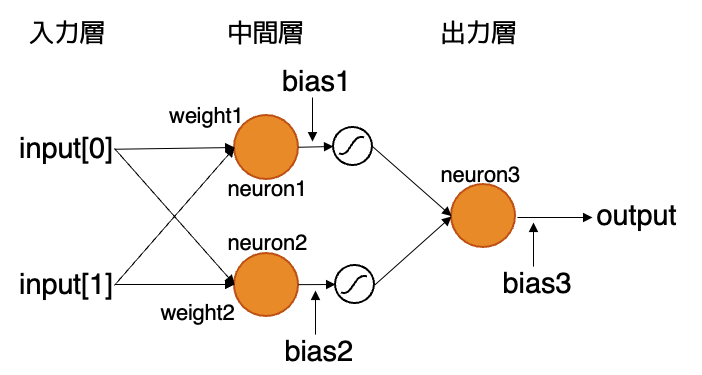

In [ ]:
# Define a neural network

# Define network as a class inheriting from nn.Module
class XOR_Net(nn.Module):
    # __init__()
    def __init__(self):
        super(XOR_Net, self).__init__()
        
        # Intermediate layer (2 neurons)
        self.weight1 = nn.Parameter(torch.tensor([0.5, 0.6]))
        self.bias1 = nn.Parameter(torch.tensor([-0.2]))

        self.weight2 = nn.Parameter(torch.tensor([-0.1, 0.23]))
        self.bias2 = nn.Parameter(torch.tensor([0.4]))

        # Output layer (1 neuron)
        self.weight3 = nn.Parameter(torch.tensor([0.3, 0.5]))
        self.bias3 = nn.Parameter(torch.tensor([0.7]))

        # Activation function (sigmoid function)
        self.activation = nn.Sigmoid()

    # Define calculation process with forward() function
    # forward() is called when y = model(x)
    def forward(self, input):
        '''
        Parameter
        =========

        - input: torch.tensor([a, b])　Receives a vector of two elements.
        '''
        # Intermediate layers
        output1 = self.activation(torch.dot(input, self.weight1) + self.bias1)
        output2 = self.activation(torch.dot(input, self.weight2) + self.bias2)
        output_12 = torch.concat([output1, output2])

        # outpu layer
        output = torch.dot(output_12, self.weight3) + self.bias3

        return output

## Generate a model and check the state before training

In [ ]:
# Generate model
model = XOR_Net()

In [ ]:
# Check status prior to study
for i in range(len(data)):
  x = data[i,:]
  y = model(x)

  print("input:", x.tolist(), "-> predicted:", round(float(y), 3), "\t, true:", float(answer[i]))

input: [0.0, 0.0] -> predicted: 1.134 	, true: 0.0
input: [1.0, 0.0] -> predicted: 1.16 	, true: 1.0
input: [0.0, 1.0] -> predicted: 1.206 	, true: 1.0
input: [1.0, 1.0] -> predicted: 1.228 	, true: 0.0


In [ ]:
# Check the weight and bias of the model (they are left at their default values).
for p in model.named_parameters():
    print(p)

('weight1', Parameter containing:
tensor([0.5000, 0.6000], requires_grad=True))
('bias1', Parameter containing:
tensor([-0.2000], requires_grad=True))
('weight2', Parameter containing:
tensor([-0.1000,  0.2300], requires_grad=True))
('bias2', Parameter containing:
tensor([0.4000], requires_grad=True))
('weight3', Parameter containing:
tensor([0.3000, 0.5000], requires_grad=True))
('bias3', Parameter containing:
tensor([0.7000], requires_grad=True))


## Perform network learning

Epoch: 2990 	, loss: 1.659827830735594e-11

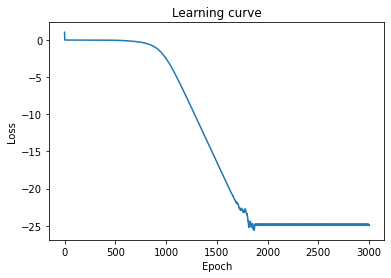

In [ ]:
# Training
# ================

# Number of epochs
n_epoch = 3000

# Set optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# For learning curve
loss_list = []

for epoch in range(n_epoch):
    optimizer.zero_grad()
    loss = torch.tensor([0.0])

    # Loads 4 data and calculates LOSS
    for i in range(len(data)):
        x = data[i,:]
        y = model(x)

        loss += (y - answer[i]) ** 2
    
    # Calculate the gradient of each weight and bias from loss
    loss.backward()

    # Update weight, bias based on gradient
    optimizer.step()

    # Store loss for learning curve creation
    loss_list.append(float(loss))

    if 0 == epoch%10:
        print("\rEpoch:", epoch, "\t, loss:", float(loss), end='')

# Draw a learning curve
plt.figure()
plt.plot(np.log(loss_list))
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
None

## Check if XOR calculation can be performed using the learned network

In [ ]:
# Check status after study
for i in range(len(data)):
  x = data[i,:]
  y = model(x)

  print("input:", x.tolist(), "-> predicted:", round(float(y), 3), ", true:", float(answer[i]))

input: [0.0, 0.0] -> predicted: -0.0 , true: 0.0
input: [1.0, 0.0] -> predicted: 1.0 , true: 1.0
input: [0.0, 1.0] -> predicted: 1.0 , true: 1.0
input: [1.0, 1.0] -> predicted: -0.0 , true: 0.0


-> It is correctly estimated.

In [ ]:
# Check weights after study
for p in model.parameters():
    print(p)

Parameter containing:
tensor([3.7855, 3.7623], requires_grad=True)
Parameter containing:
tensor([-0.9694], requires_grad=True)
Parameter containing:
tensor([-1.7643, -1.7592], requires_grad=True)
Parameter containing:
tensor([2.4209], requires_grad=True)
Parameter containing:
tensor([2.5808, 2.7909], requires_grad=True)
Parameter containing:
tensor([-3.2729], requires_grad=True)


-> The learned values have been changed from the initial values.

# Exercise 4 - Let's make an AI to remove noise from MR images.

Now it is time to start developing an AI to remove noise from MR images.

In this EXERCISE, we will divide the process into 5 steps.

- 4.1 Loading MR Images
- 4.2 Creating noise-adding functions
- 4.3 Network Definition (DnCNN)
- 4.4 network learning
- 4.5 Evaluation



## Exercise 4.1 Loading MR Images

This hands-on will use a publicly available MR image dataset ([CHAOS](https://chaos.grand-challenge.org/)) to develop an AI to perform noise removal.

If the preparation performed at the beginning was successful, 20 liver T1-weighted images (in-phase) should be stored in the directory `dataset/JSMRM2022_CHAOS_partial`.

MR images are stored in the DICOM (Digital Imaging and Communications in Medicine) format.

In most cases, a single DICOM file contains one image and header information (e.g., study and patient information, imaging conditions, reconstruction conditions).

In [ ]:
# Loading DICOM files
dcm_path = 'dataset/JSMRM2022_CHAOS_partial/1/IMG-0004-00062.dcm'
dcm = pydicom.dcmread(dcm_path)

# Check header information
print("Magnetic field strength:", dcm.MagneticFieldStrength)
print("Slice thickness:", dcm.SliceThickness)
print("Acquisition Matrix:", dcm.AcquisitionMatrix)

# Comment in and run the following when checking all headers
#[print(h) for h in dcm]

Magnetic field strength: 1.5
Slice thickness: 5
Acquisition Matrix: [192, 0, 0, 115]


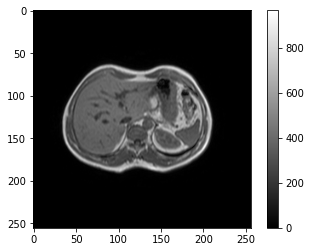

In [ ]:
# Image Confirmation
img_raw = dcm.pixel_array.astype(np.float32)
plt.imshow(img_raw, cmap='gray')
plt.colorbar()

Next, the image is preprocessed.

The image is normalized so that the pixel luminances in the image fall between 0 and 1 so that network training can proceed successfully.

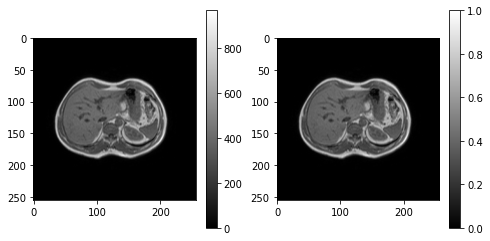

In [ ]:
# Image Preprocessing

# Define a function to normalize from 0 to 1
def normalize(img):
    val_max = np.max(img)
    val_min = np.min(img)

    if val_max > val_min: # Support for division by zero
        ret = (img - val_min) / (val_max - val_min)
    else:
        ret = img

    return ret

# Normalize image
img = normalize(img_raw)

# Check the range of values with the color bar
# plt.figure()
# plt.imshow(img, cmap='gray')
# plt.colorbar()

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
a0 = ax[0].imshow(img_raw, cmap='gray')
plt.colorbar(a0, ax=ax[0])
a1 = ax[1].imshow(img, cmap='gray')
plt.colorbar(a1, ax=ax[1])

## Exercise 4.2 Creating noise-adding functions

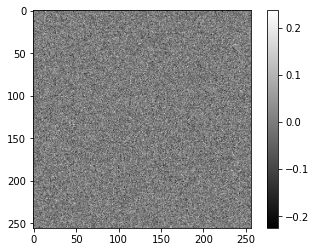

In [ ]:
rng = np.random.default_rng(0)

# Function to create a noise image that follows a normal distribution
def gen_noise(img_size, noise_mean=0.0, noise_sigma=0.05):
    return rng.normal(noise_mean, noise_sigma, img.shape).astype(np.float32)

# Generate noise image
noise = gen_noise(img.shape)

# Check noise image
plt.figure()
plt.imshow(noise, cmap='gray')
plt.colorbar()

Text(0.5, 1.0, 'Noisy')

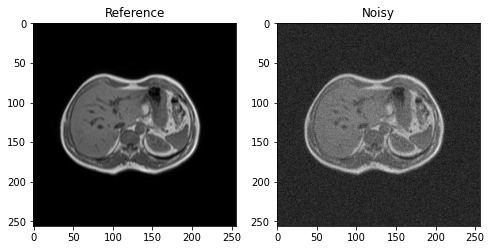

In [ ]:
# Adds noise to the image
img_noisy = img + noise

# Visual confirmation
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(img, cmap='gray')
ax[0].set_title("Reference")

ax[1].imshow(img_noisy, cmap='gray')
ax[1].set_title("Noisy")

## Exercise 4.3 network definition

The network uses DnCNN, a noise reduction network.

- Zhang K, et al. IEEE Trans on Image Process. 2017;26(7):3142-3155.

DnCNN is a network consisting of 17 convolutional layers (2D convolutional layer) (see figure below).

The network itself is a so-called residual network that predicts only the noise component from a given input image.

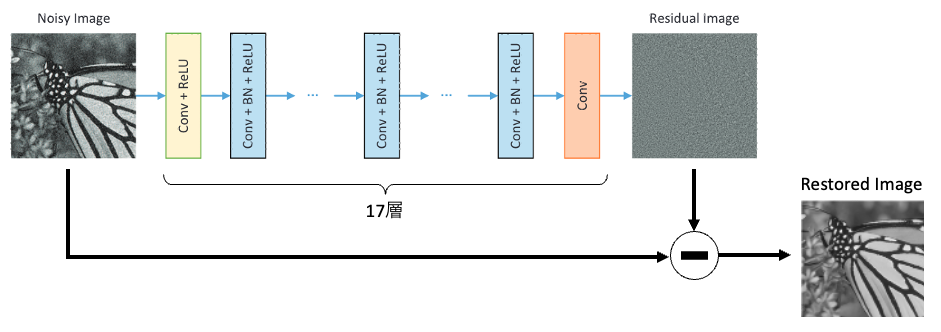

Now, let's define the network.

Although the code is described here for the purpose of explanation, we recommend that you use the reference code published by the authors of the reference paper.

In deep learning, the key points are often the network definition, small innovations during training, and parameters, which can be difficult to understand from the paper itself.

In [ ]:
# DnCNN definition

class DnCNN(nn.Module):
    def __init__(self, n_in_channel=1, n_layers=17, n_features=64, bn_mo=0.1):
        super(DnCNN, self).__init__()
        layers = []

        ## 1st layer
        layers.append(nn.Conv2d(n_in_channel, n_features, kernel_size=3, stride=1, padding=1))
        layers.append(nn.ReLU(inplace=True))

        # intermediate layers
        # Define using a for loop since it is a repetition of the same structure.
        for i in range(n_layers - 2):
            layers.append(nn.Conv2d(n_features, n_features, kernel_size=3, padding=1))
            layers.append(nn.BatchNorm2d(n_features, momentum=bn_mo))
            layers.append(nn.ReLU(inplace=True))

        # final layer
        layers.append(nn.Conv2d(n_features, n_in_channel, kernel_size=3, padding=1))

        # Combine overlapping Conv2d, activation functions (ReLU), etc. into one
        self.layers = nn.Sequential(*layers)

        # Initialize weights
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.ones_(m.weight)
                nn.init.zeros_(m.bias)

    def forward(self, inputs):
        y = inputs
        residual = self.layers(y)
        return y - residual


## Exercise 4.4 network training

The training is performed using the prepared images and network.

The training code is based on the one used to train `XOR_Net`.

Epoch: 490 	, loss: 0.0006320609245449305    

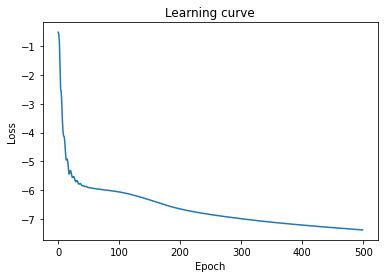

In [ ]:
# network learning
# ================

# epoch number
n_epoch = 500

# Generate model
model = DnCNN().cuda()

# Prepare training data
training_data = [torch.tensor(img_noisy).cuda().reshape((1, 1, *img.shape))]
reference_data = [torch.tensor(img).cuda().reshape((1, 1, *img.shape))]

# Set optimizer, etc.
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()

# For learning curve creation
loss_list = []

for epoch in range(n_epoch):
    optimizer.zero_grad()

    # Input images to the model and calculate the denoised image.
    x = training_data[0]
    ref = reference_data[0]
    y = model(x)

    # Calculate loss
    loss = criterion(y, ref)
    
    # Calculate the gradient of each weight and bias from loss
    loss.backward()

    # Update weight, bias based on gradient
    optimizer.step()

    # For learning curve creation
    loss_list.append(float(loss))

    # Display current loss
    if 0 == epoch % 10:
        print("\rEpoch:", epoch, "\t, loss:", float(loss), "   ", end="")

# Draw a learning curve
plt.figure()
plt.plot(np.log(loss_list))
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
None


## Exercise 4.5 Evaluation

Check the denoised image using the learned network.

### Denoise the images used for learning

MSE: 0.0006250396836549044


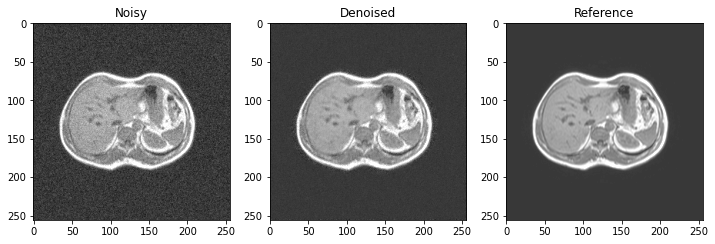

In [ ]:
model.eval()
img_denoised = model(training_data[0]).squeeze().cpu().detach().numpy()

# Visual confirmation
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(img_noisy, cmap='gray', vmin=-0.2, vmax=0.7)
ax[0].set_title("Noisy")

ax[1].imshow(img_denoised, cmap='gray', vmin=-0.2, vmax=0.7)
ax[1].set_title("Denoised")

ax[2].imshow(img, cmap='gray', vmin=-0.2, vmax=0.7)
ax[2].set_title("Reference")

print("MSE:", np.sum((img_denoised - img)**2)/np.prod(img.shape))

### Inference : Denoise images not used for training

MSE (training image): 0.0006250396836549044
MSE (this image):     0.0007763265166431665


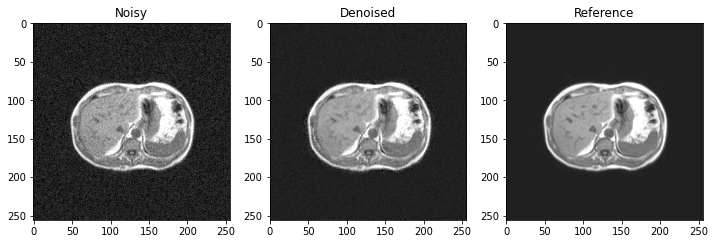

In [ ]:
# Load
dcm_path = 'dataset/JSMRM2022_CHAOS_partial/21/IMG-0004-00054.dcm'
dcm = pydicom.dcmread(dcm_path)
img2 = normalize(dcm.pixel_array.astype(np.float32))

# Noise Image Generation
img2_noisy = img2 + gen_noise(img2.shape)

# Denoising with DnCNN
model.eval()
img2_denoised = model(torch.tensor(img2_noisy).cuda().reshape((1,1,*img2.shape))).squeeze().cpu().detach().numpy()

# display
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(img2_noisy, cmap='gray', vmin=-0.1, vmax=0.7)
ax[0].set_title("Noisy")

ax[1].imshow(img2_denoised, cmap='gray', vmin=-0.1, vmax=0.7)
ax[1].set_title("Denoised")

ax[2].imshow(img2, cmap='gray', vmin=-0.1, vmax=0.7)
ax[2].set_title("Reference")

print("MSE (training image):", np.sum((img_denoised - img)**2)/np.prod(img.shape))
print("MSE (this image):    ", np.sum((img2_denoised - img2)**2)/np.prod(img2.shape))

-> Visually, the image is improved enough, but the MSE is larger and the denoise effect is weaker than in the one before.

# Exercise 5 - Improve performance (Advanced)

There are many ways to improve performance, but some common ones include

- Add ingenuity to the study data
    - **Data augmentation**
    - Add some ingenuity to the data itself
- Adjust the learning parameters
- Change the loss function (Loss)
- Change the network
    - Increase the number of layers
    - Change the network structure itself

Let's run the **data augmentation** case as an example.

## Exercise 5.1 - data augmentation

### Using Dataset & DataLoader

DataLoader is a class that allows you to easily handle data for network training.

You can define your own dataset classes to be passed as arguments, which has various advantages.

- The code for network learning can be separated from the code that handles the training data.
- The network training code can be more transparent.
- Even when data in a different format (e.g., jpg images instead of DICOM images) is used, it can be handled by simply defining and switching the dataLoader for the data.

In [ ]:
# Define a dataset to read DICOM images
import glob
import os

from torch.utils.data import Dataset
from torchvision import transforms


# Define a dataset to read DICOM images
class DcmImages(Dataset):
    def __init__(self, dcm_root_dir="dataset/JSMRM2022_CHAOS_partial/",
                 noise_mean=0.0, noise_sigma=0.05, img_size=256):
        self.root_dir = dcm_root_dir
        self.noise_mean = noise_mean
        self.noise_sigma = noise_sigma
        self.img_size = img_size

        # Initialize list of DICOM images
        self.dcm_path_list = self.search_dcm_files(self.root_dir)
        
    def __getitem__(self, index):
        # Read DICOM image of given index
        dcm = pydicom.dcmread(self.dcm_path_list[index])

        # change to torch.tensor
        img = torch.tensor(dcm.pixel_array.astype(np.float32)).unsqueeze(0)

        # Normalized so that values are in the range 0 to 1
        img = self.normalize(img)

        # Resize images so that they are the same size
        img = transforms.functional.resize(img, (self.img_size, self.img_size))
        
        # Add noise
        img_noisy = img + torch.normal(self.noise_mean, self.noise_sigma, size=img.shape)
        
        # Return value to DataLoader
        return img, img_noisy

    def __len__(self):
        return len(self.dcm_path_list)
    
    def normalize(self, img):
        val_max = torch.max(img)
        val_min = torch.min(img)

        if val_max > val_min:
            ret = (img - val_min) / (val_max - val_min)
        else:
            ret = img

        return ret

    def search_dcm_files(self, root_dir):
        return [p for p in glob.glob(os.path.join(root_dir, "**/*")) if pydicom.misc.is_dicom(p)]

Next, network training will be performed using the defined Dataset.

Dataset size: 647 images
Epoch: 0 	, batch: 60 	, loss: 0.0028234648052603006      

Text(0, 0.5, 'Loss')

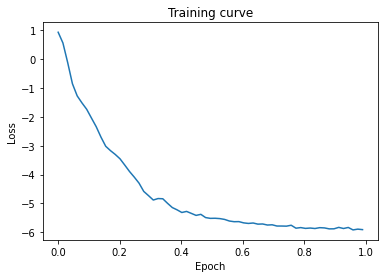

In [ ]:
# Training
# ================
from torch.utils.data import DataLoader

# Epoch number and mini-batch size
n_epoch = 1
batch_size = 10

# Generate model
model2 = DnCNN().cuda()

# Prepare training data
dataset = DcmImages()
dataloader = DataLoader(dataset, batch_size, shuffle=True)
print("Dataset size:", len(dataset), "images")

# Set optimizer, etc.
optimizer = torch.optim.Adam(model2.parameters())
criterion = nn.MSELoss()

# For learning curve creation
loss_list = []

for epoch in range(n_epoch):

    # Use DataLoader to calculate for each mini-batch
    for i, (img, img_noisy) in enumerate(dataloader):
        img = img.cuda()
        img_noisy = img_noisy.cuda()

        optimizer.zero_grad()

        # Input images to the model and calculate the denoised image.
        img_denoised = model2(img_noisy)

        # Calculate loss
        loss = criterion(img, img_denoised)
    
        # Calculate the gradient of each weight and bias from loss
        loss.backward()

        # Update weight, bias based on gradient
        optimizer.step()

        # Save loss for learning curve creation
        loss_list.append(float(loss))
        if 0 == i % 5:
            print("\rEpoch:", epoch, "\t, batch:", i, "\t, loss:", float(loss), "     ", end="")

# Draw a learning curve
plt.figure()
plt.plot(np.arange(len(loss_list))/64.7, np.log(loss_list))
plt.title("Training curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")

Let's denoise the previous image using the network trained with more images (1→647 images).

MSE: 0.0007763265166431665


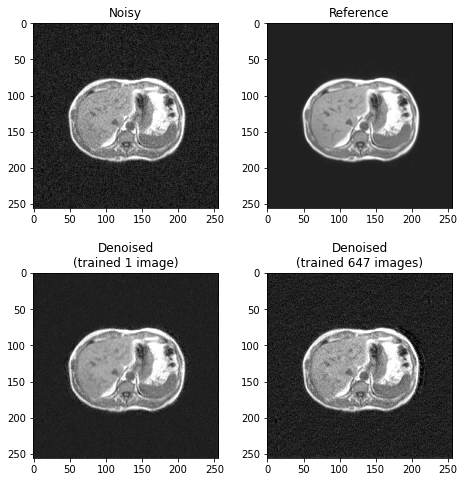

In [ ]:
# Denoising with DnCNN
model2.eval()
img2_denoised_model2 = model2(torch.tensor(img2_noisy).cuda().reshape((1,1,*img2_noisy.shape))).squeeze().cpu().detach().numpy()

# Display
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
plt.subplots_adjust(wspace=0.1, hspace=0.35)

ax[0, 0].imshow(img2_noisy, cmap='gray', vmin=-0.1, vmax=0.7)
ax[0, 0].set_title("Noisy")

ax[0, 1].imshow(img2, cmap='gray', vmin=-0.1, vmax=0.7)
ax[0, 1].set_title("Reference")

ax[1, 0].imshow(img2_denoised, cmap='gray', vmin=-0.1, vmax=0.7)
ax[1, 0].set_title("Denoised\n(trained 1 image)")

ax[1, 1].imshow(img2_denoised_model2, cmap='gray', vmin=-0.1, vmax=0.7)
ax[1, 1].set_title("Denoised\n(trained 647 images)")


print("MSE:", np.sum((img2_denoised - img2)**2)/np.prod(img2.shape))

## Exercise 5.2 - Try using pre-trained weights

Let's load in the 100 epoch learned weights using the 647 images from earlier.

In [ ]:
# load model
model_path = 'dncnn_epoch100_bs10.pth'

model3 = DnCNN()
model3.load_state_dict(torch.load(model_path))

<All keys matched successfully>

MSE: 0.0007763265166431665


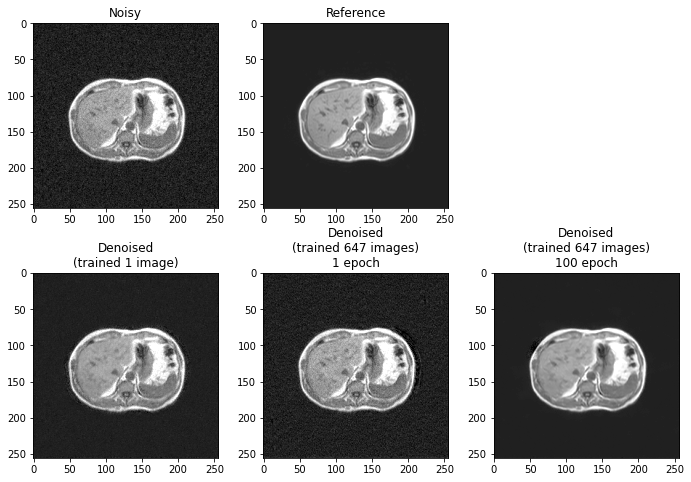

In [ ]:
# Denoising with DnCNN
model3.cuda()
model3.eval()
img2_denoised_model3 = model3(torch.tensor(img2_noisy).cuda().reshape((1,1,*img2_noisy.shape))).squeeze().cpu().detach().numpy()

# Display
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
plt.subplots_adjust(wspace=0.1, hspace=0.35)

ax[0, 0].imshow(img2_noisy, cmap='gray', vmin=-0.1, vmax=0.7)
ax[0, 0].set_title("Noisy")

ax[0, 1].imshow(img2, cmap='gray', vmin=-0.1, vmax=0.7)
ax[0, 1].set_title("Reference")

ax[0, 2].remove()

ax[1, 0].imshow(img2_denoised, cmap='gray', vmin=-0.1, vmax=0.7)
ax[1, 0].set_title("Denoised\n(trained 1 image)")

ax[1, 1].imshow(img2_denoised_model2, cmap='gray', vmin=-0.1, vmax=0.7)
ax[1, 1].set_title("Denoised\n(trained 647 images)\n1 epoch")

ax[1, 2].imshow(img2_denoised_model3, cmap='gray', vmin=-0.1, vmax=0.7)
ax[1, 2].set_title("Denoised\n(trained 647 images)\n100 epoch")


print("MSE:", np.sum((img2_denoised - img2)**2)/np.prod(img2.shape))